In [13]:
from read_ferro_bare import read_ferro_bare_csv

import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy import integrate

ref_file = 'example/FERRO BARE.csv'

# Read a single file
ref_metadata, ref_data = read_ferro_bare_csv(ref_file)

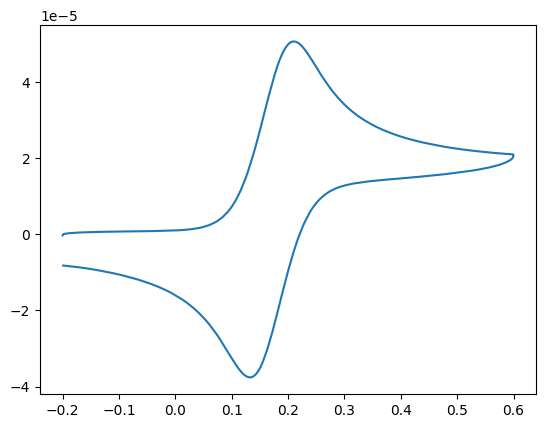

In [14]:
plt.plot(ref_data["Potential_V"], ref_data["Current_A"])

In [15]:
file_list = glob.glob('example/*.csv')  
file_list

['example/MOD FERRO CV -1 to 1.7 V.csv',
 'example/FERRO MOD -0.5 to 1.7 V.csv',
 'example/FERRO MOD 9 0.0 to 1.7.csv',
 'example/FERRO BARE.csv',
 'example/data.csv']

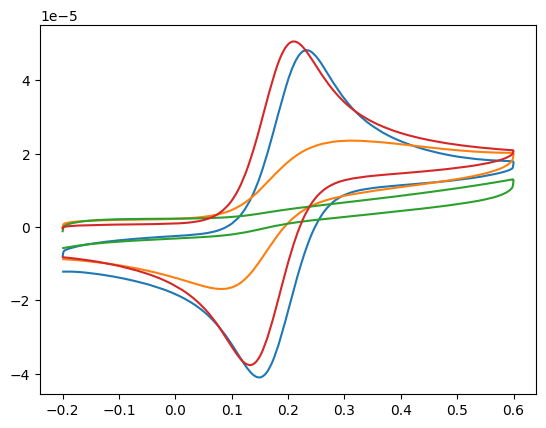

In [18]:
def get_diff_between_curves(data, ref_data):
    diff = data["Current_A"] - ref_data["Current_A"]
    return np.abs(diff).sum()

def get_min_max_difference(data, ref_data):
    diff = data["Current_A"] - ref_data["Current_A"]
    return diff.max() - diff.min()

def get_area_between_curves(data, ref_data):

    diff = data["Current_A"] - ref_data["Current_A"]

    # Return sum of absolute differences
    return integrate.trapezoid(np.abs(diff), data["Potential_V"]).sum()


metadata_list = []
for file in file_list:
    try:
        meta, data = read_ferro_bare_csv(file)

        plt.plot(data["Potential_V"], data["Current_A"])

        area_diff = get_diff_between_curves(data, ref_data)
        min_max_diff = get_min_max_difference(data, ref_data)
        area_diff2 = get_area_between_curves(data, ref_data)


        meta['Area_Difference'] = area_diff
        meta['Area_Difference2'] = area_diff2
        meta['Min_Max_Difference'] = min_max_diff

        metadata_list.append(meta)
    except:
        None

# Merge all metadata
all_data = pd.concat(metadata_list, ignore_index=True)

In [19]:
all_data

,DateTime,Technique,File_Path,Data Source,Instrument Model,Init E (V),High E (V),Low E (V),Init P/N,Scan Rate (V/s),...,Quiet Time (sec),Sensitivity (A/V),Filename,Area_Difference,Area_Difference2,Min_Max_Difference,Ep,Eh,ip,Ah
0,Apr. 16. 2025 17:05:51,Cyclic Voltammetry,d:\serah 2nd year\16-04-25 l-arg -1 to 1.7 con...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,...,2,0.0001,MOD FERRO CV -1 to 1.7 V.csv,0.006636,3.051281e-07,0.000018,NaN,NaN,NaN,NaN
1,July 4. 2025 17:02:03,Cyclic Voltammetry,d:\serah 2nd year\04-07-25 scanrate opt ll\-0....,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,...,2,0.0001,FERRO MOD -0.5 to 1.7 V.csv,0.009460,8.744994e-07,0.000058,0.081V,0.170V,-2.004e-5A,-3.801e-5C
2,July 1. 2025 13:51:56,Cyclic Voltammetry,d:\serah 3rd year\02-09-25 l-lysine stability\...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,...,2,0.0001,FERRO MOD 9 0.0 to 1.7.csv,0.021096,1.156631e-06,0.000082,NaN,NaN,NaN,NaN
3,Sept. 12. 2025 15:54:51,Cyclic Voltammetry,d:\serah 3rd year\02-09-25 l-lysine stability\...,Experiment,CHI760D,-0.2,0.6,-0.2,P,0.05,...,2,0.0001,FERRO BARE.csv,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN


In [24]:
1.156631e-06 / 8.744994e-07

1.32262069019144

In [22]:
0.021096 / 0.009460

2.2300211416490487

In [21]:
0.009460*1.322

0.01250612

In [ ]:
metadata, data = read_ferro_bare_csv('example/FERRO MOD -0.5 to 1.7 V.csv')

diff = data["Current_A"] - ref_data["Current_A"]
a = integrate.trapezoid(np.abs(diff), data["Potential_V"])

a

np.float64(8.744993630000019e-07)

In [40]:
metadata, data = read_ferro_bare_csv('example/FERRO MOD -0.5 to 1.7 V.csv')

diff = data["Current_A"] - ref_data["Current_A"]
a = integrate.trapezoid(np.abs(diff), dx=0.001)

a

np.float64(9.459979603e-06)

In [41]:
diff = data["Current_A"] - ref_data["Current_A"]
b = np.abs(diff)*0.001
b.sum()

np.float64(9.460396003e-06)

In [42]:
0.199 - 0.198

0.0010000000000000009